# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     972.9
Date:                Fri, 05 May 2023   Prob (F-statistic):           1.33e-41
Time:                        09:24:07   Log-Likelihood:                 1.7110
No. Observations:                  50   AIC:                             4.578
Df Residuals:                      46   BIC:                             12.23
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9496      0.083     59.567      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.38202436  4.87951196  5.33753734  5.72944344  6.03819359  6.2591706
  6.40093533  6.48382018  6.53658855  6.59170904  6.68002102  6.82566777
  7.0421298   7.33001006  7.67693489  8.05958692  8.44753612  8.80823932
  9.11238697  9.33871864  9.47751601  9.53219959  9.51876672  9.46316329
  9.39702085  9.35245969  9.35681151  9.42812895  9.57221957  9.78169169
 10.03716881 10.31047312 10.56925506 10.7823082  10.92469644 10.98185089
 10.95196353 10.84628423 10.68727245 10.50490721 10.33176163 10.19765124
 10.12473539 10.12387651 10.19285548 10.31673618 10.47031949 10.62228342
 10.74032922 10.79648796]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.75401275 10.58081012 10.29606185  9.94348075  9.58060825  9.26472628
  9.03883262  8.92111355  8.90049125  8.93933598]


## Plot comparison

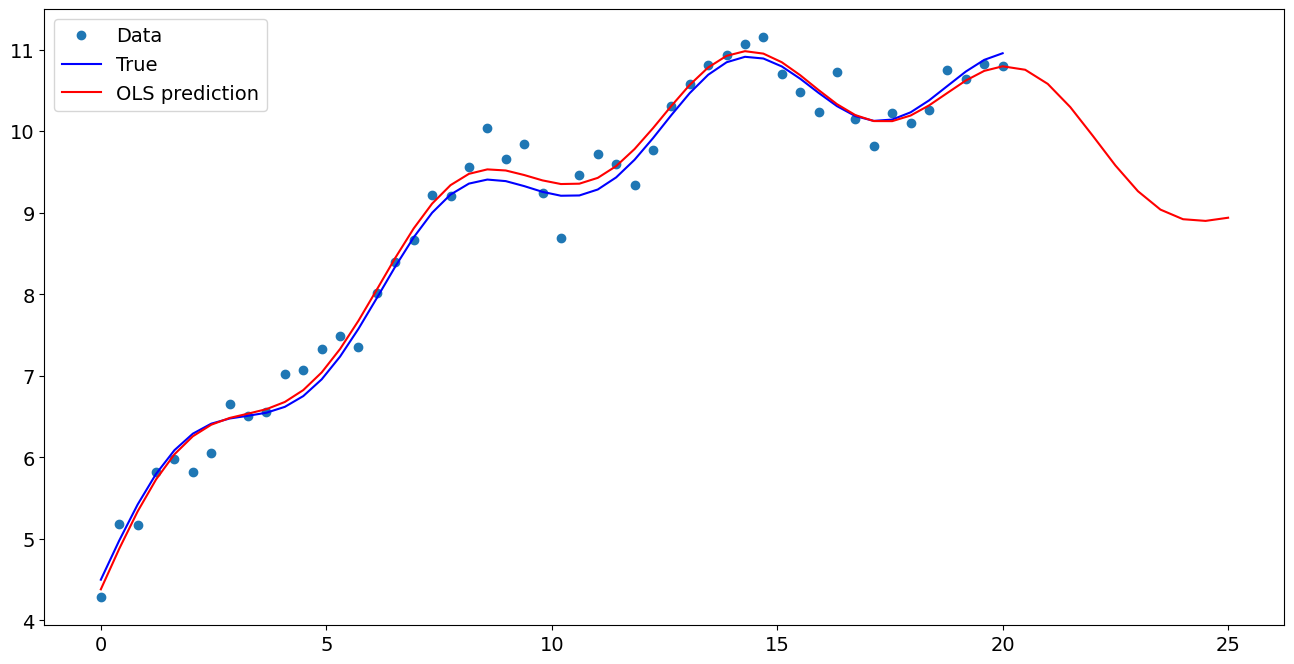

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.949594
x1                  0.525424
np.sin(x1)          0.489128
I((x1 - 5) ** 2)   -0.022703
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.754013
1    10.580810
2    10.296062
3     9.943481
4     9.580608
5     9.264726
6     9.038833
7     8.921114
8     8.900491
9     8.939336
dtype: float64